# Lista 4
### Maria Nowacka 275981

In [59]:
from sklearn.ensemble import RandomForestClassifier
!pip install graphviz xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [60]:
import matplotlib.pyplot as plt, seaborn as sns, pandas as pd, graphviz, numpy as np, xgboost as xgb, time
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree, DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

### zadanie 1
Wstęp do drzew decyzyjnych: Wczytaj zbiór danych Iris i zwizualizuj go. Zbuduj model drzewa decyzyjnego, używając klasy
`DecisionTreeClassifier` z biblioteki `scikit-learn`. Przedstaw strukturę drzewa na wykresie za pomocą funkcji `plot_tree` lub
`export_graphviz` i zinterpretuj warunki podziału.

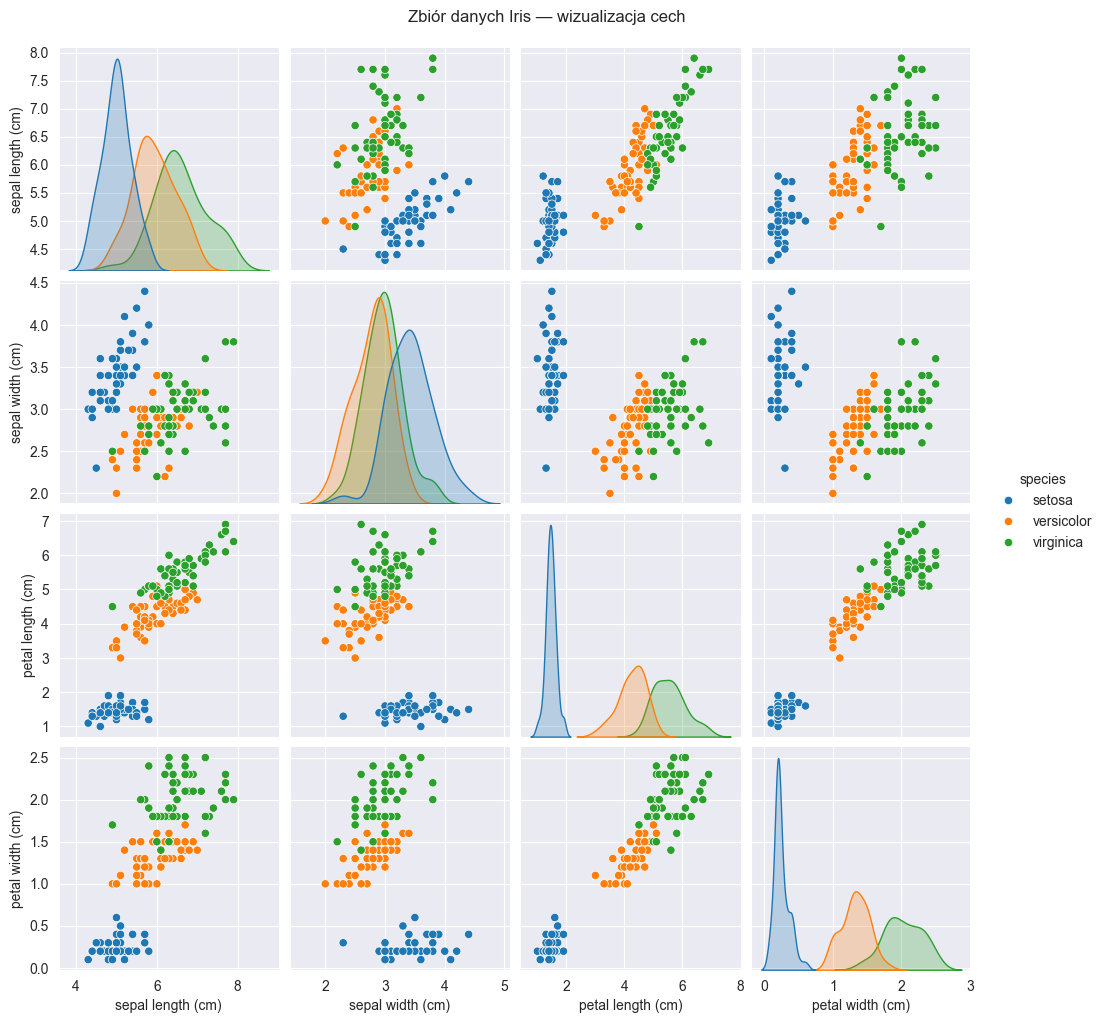

In [61]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Zamiana etykiet numerycznych na nazwy gatunków
y_named = y.replace(dict(enumerate(iris.target_names)))

sns.pairplot(pd.concat([X, y_named], axis=1), hue="species")
plt.suptitle("Zbiór danych Iris — wizualizacja cech", y=1.02)
plt.show()

In [62]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:
tree.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

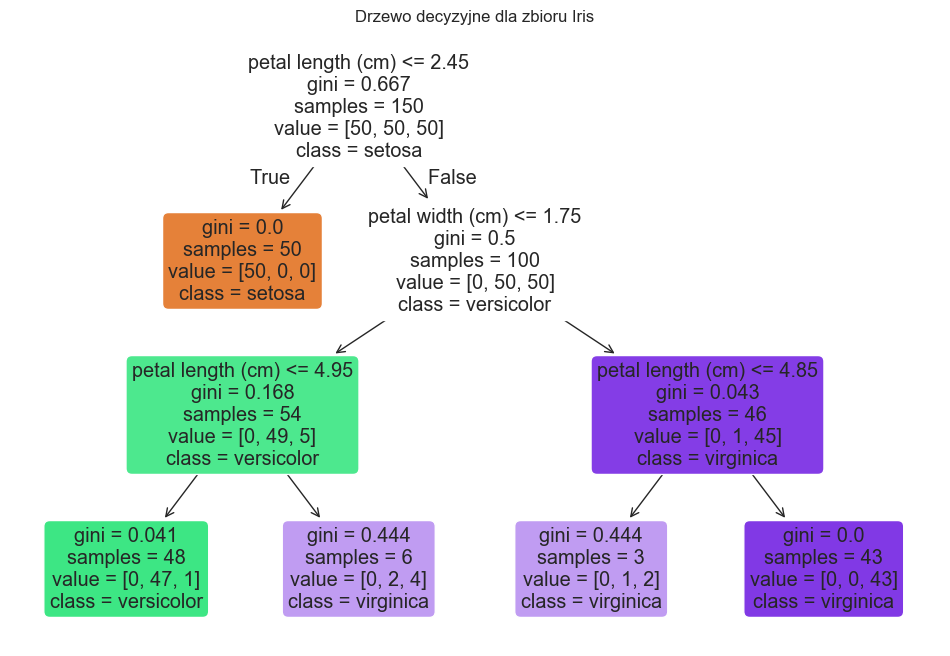

In [64]:
plt.figure(figsize=(12, 8))
plot_tree(
    tree,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title("Drzewo decyzyjne dla zbioru Iris")
plt.show()


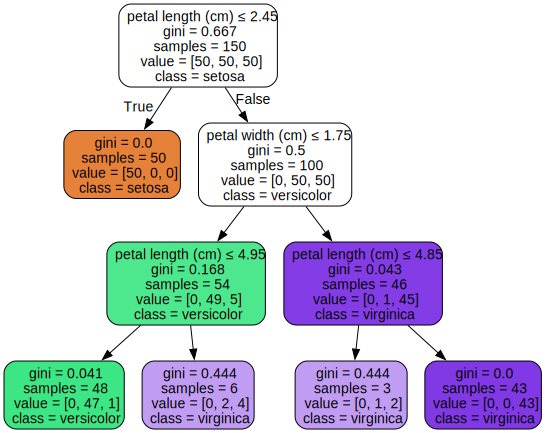

In [65]:
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("iris_tree", format="png", cleanup=True)
graph



### zadanie 2
Problem przeuczenia (overfitting): Wytrenuj dwa modele drzewa
decyzyjnego na danych Iris: jeden bez ograniczeń (domyślne parametry) i drugi z ograniczoną maksymalną głębokością (`max_depth`). Porównaj ich dokładność na zbiorze treningowym i testowym. Wyjaśnij zjawisko przeuczenia.

In [79]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)
tree_full = DecisionTreeClassifier()
tree_full.fit(X_train, y_train)
tree_2 = DecisionTreeClassifier(max_depth=1)
tree_2.fit(X_train, y_train)
tree_3 = DecisionTreeClassifier(max_depth=3)
tree_3.fit(X_train, y_train)
tree_4 = DecisionTreeClassifier(max_depth=5)
tree_4.fit(X_train, y_train)
results = pd.DataFrame({
    "Model": ["Pełne drzewo", "Ograniczone drzewo (max_depth=1)", "Ograniczone drzewo (max_depth=3)", "Ograniczone drzewo (max_depth=5)"],
    "Train accuracy": [
        accuracy_score(y_train, tree_full.predict(X_train)),
        accuracy_score(y_train, tree_2.predict(X_train)),
        accuracy_score(y_train, tree_3.predict(X_train)),
        accuracy_score(y_train, tree_4.predict(X_train)),
    ],
    "Test accuracy": [
        accuracy_score(y_test, tree_full.predict(X_test)),
        accuracy_score(y_test, tree_2.predict(X_test)),
        accuracy_score(y_test, tree_3.predict(X_test)),
        accuracy_score(y_test, tree_4.predict(X_test)),
    ]
})

results


,Model,Train accuracy,Test accuracy
0,Pełne drzewo,1.000000,0.977778
1,Ograniczone drzewo (max_depth=1),0.647619,0.711111
2,Ograniczone drzewo (max_depth=3),0.961905,0.955556
3,Ograniczone drzewo (max_depth=5),0.990476,0.977778


### zadanie 3
Lasy losowe (Random Forest): Zbuduj model lasu losowego, używając klasy `RandomForestClassifier`. Porównaj jego dokładność i stabilność z modelem pojedynczego drzewa decyzyjnego. Wyjaśnij, w jaki
sposób losowość wpływa na poprawę wyników.

*Losowość Random Forest:*
- unika błędów wynikających z przypadkowych podziałów
- staje się dużo stabilniejszy
- lepiej generalizuje
- każde drzewo widzi losową próbkę i losowy zbiór cech.

In [90]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Train accuracy": [
        accuracy_score(y_train, tree.predict(X_train)),
        accuracy_score(y_train, forest.predict(X_train)),
    ],
    "Test accuracy": [
        accuracy_score(y_test, tree.predict(X_test)),
        accuracy_score(y_test, forest.predict(X_test)),
    ]
})

results


,Model,Train accuracy,Test accuracy
0,Decision Tree,1.0,0.955556
1,Random Forest,1.0,0.977778


### zadanie 4
Znaczenie cech (Feature Importance): Dla wytrenowanego modelu lasu losowego, uzyskaj informację o ważności poszczególnych cech.
Zwizualizuj ważność cech na wykresie słupkowym i zinterpretuj, które
zmienne mają największy wpływ na klasyfikację.

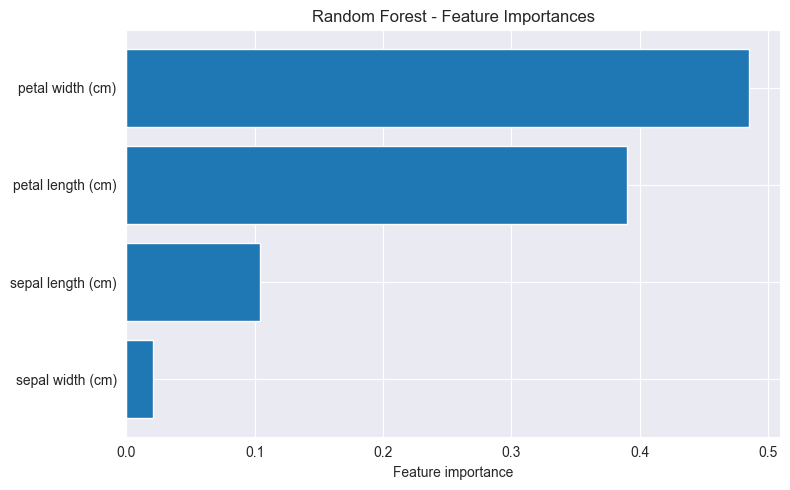

In [68]:
forest = RandomForestClassifier(n_estimators=200)
forest.fit(X, y)

importances = forest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 5))
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), np.array(iris.feature_names)[indices])
plt.xlabel("Feature importance")
plt.title("Random Forest - Feature Importances")
plt.tight_layout()
plt.show()


### zadanie 5
Zastosowanie AdaBoost: Użyj klasy `AdaBoostClassifier` z biblioteki `scikit-learn`. Wytrenuj model z różną liczbą estymatorów
(`n_estimators`) i przeanalizuj, jak wpływa to na wydajność.

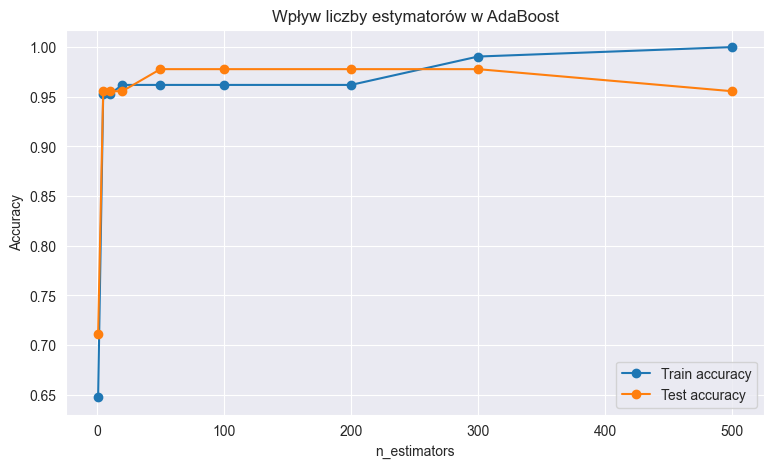

In [92]:
estimators = [1,5,10,20,50,100,200,300,500]
train_acc = []
test_acc = []
for n in estimators:
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),n_estimators=n, learning_rate=0.1)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.figure(figsize=(9,5))
plt.plot(estimators, train_acc, marker='o', label="Train accuracy")
plt.plot(estimators, test_acc, marker='o', label="Test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Wpływ liczby estymatorów w AdaBoost")
plt.legend()
plt.grid(True)
plt.show()

### zadanie 6
Wprowadzenie do Gradient Boosting: Wytrenuj model wzmacniania gradientowego (`GradientBoostingClassifier`) i porównaj jego wyniki z modelem lasu losowego. Omów, jaka jest główna różnica w
sposobie budowania modelu przez te dwa algorytmy.

Główna różnica:
- Gradient Boosting poprawia poprzednie drzewo, minimalizuje błąd (może się przeuczyć)
- Random Forest - wiele drzew uczy się równolegle

In [109]:
gb = GradientBoostingClassifier(n_estimators=50)
gb.fit(X_train, y_train)
gb.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

pred_gb = gb.predict(X_test)
pred_rf = rf.predict(X_test)

print("Accuracy Gradient Boosting:", accuracy_score(y_test, pred_gb))
print("Accuracy Random Forest   :", accuracy_score(y_test, pred_rf))

Accuracy Gradient Boosting: 0.9777777777777777
Accuracy Random Forest   : 0.9777777777777777


### zadanie 7
Zaawansowane biblioteki - XGBoost: Zainstaluj bibliotekę `xgboost`
i użyj jej do wytrenowania modelu na zbiorze danych do klasyfikacji.
Porównaj jego dokładność i czas potrzebny na wyuczenie z modelami
z `scikit-learn`. Wyjaśnij, dlaczego XGBoost jest często używany w
konkursach Data Science.

In [111]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

start = time.time()
xgb_model.fit(X_train, y_train)
end = time.time()

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"XGBoost Accuracy: {accuracy}")
print(f"Training time: {end - start:.4f} seconds")

XGBoost Accuracy: 0.9777777777777777
Training time: 0.1443 seconds


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier()
start = time.time()
rf_model.fit(X_train, y_train)
end = time.time()
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest Accuracy: {rf_acc}, Training time: {end - start:.4f} s")

lr_model = LogisticRegression(max_iter=200)
start = time.time()
lr_model.fit(X_train, y_train)
end = time.time()
lr_acc = accuracy_score(y_test, lr_model.predict(X_test))
print(f"Logistic Regression Accuracy: {lr_acc}, Training time: {end - start:.4f} s")


Random Forest Accuracy: 0.9777777777777777, Training time: 0.0721 s
Logistic Regression Accuracy: 0.9777777777777777, Training time: 0.0331 s


*Dlaczego XGBoost jest często używany w
konkursach Data Science?* \
Na dużych, nieliniowych i skomplikowanych danych XGBoost:

 - poprawia dokładność dzięki boostingowi,

 - obsługuje brakujące dane i dużą liczbę cech,

 - pozwala kontrolować przeuczenie dzięki regularyzacji.

In [115]:
accuracy - rf_acc

0.0

In [113]:
accuracy - lr_acc

0.0